[Dataset](https://www.kaggle.com/plameneduardo/sarscov2-ctscan-dataset) link

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [2]:
datapath = "../../../deeplearning/TensorFlow2.0_ResNet/dataset/"
print(os.path.exists(datapath))
image_dims = (180, 180)
batch_size = 64

True


In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
validation_datagen = ImageDataGenerator(rescale = 1./255)
train_generator = train_datagen.flow_from_directory(os.path.join(datapath, "train"),
                                             target_size = image_dims,
                                            batch_size = 128,
                                             class_mode = 'binary',
                                            color_mode = 'rgb',
                                                   shuffle=True)
test_generator = test_datagen.flow_from_directory(os.path.join(datapath, "test"), 
                                                             target_size = image_dims,
                                                              batch_size = 128,
                                                             class_mode = 'binary', 
                                                             color_mode = 'rgb')
validation_generator = validation_datagen.flow_from_directory(os.path.join(datapath, "valid"), 
                                                     target_size = image_dims,
                                                      batch_size = 128,
                                                     class_mode = 'binary', 
                                                     color_mode = 'rgb',
                                                             shuffle=True)

Found 1488 images belonging to 2 classes.
Found 495 images belonging to 2 classes.
Found 498 images belonging to 2 classes.


In [4]:
import matplotlib.pyplot as plt
import numpy as np

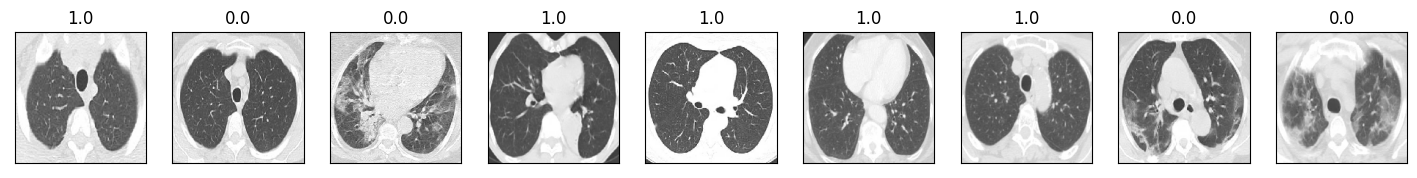

In [5]:
n = 10
plt.figure(figsize=(20, 4))
xtrain, ytrain = next(train_generator)
# samples = iter(enumerate(train_generator), n)
for i in range(1, n):
    ax = plt.subplot(1, n, i)
    plt.imshow(xtrain[i])
    ax.title.set_text(ytrain[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## loading DenseNet169 and adding layers at the top

In [6]:
import tensorflow as tf
import keras

In [8]:
dense169_model = tf.keras.applications.DenseNet169(weights='imagenet',
                                      include_top=False,
                                        input_shape=(180, 180, 3)
                                      )
dense169_model.summary()
print(len(dense169_model.layers))
dense169_model.trainable=False 
x = dense169_model.layers[-1].output #
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(1000, activation='relu')(x)
x = keras.layers.Dense(500, activation='relu')(x)
x = keras.layers.Dense(200, activation='relu')(x)
output = keras.layers.Dense(1)(x)

model = keras.Model(dense169_model.input, output)
model.summary()

Model: "densenet169"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_2 (ZeroPadding2  (None, 186, 186, 3)  0          ['input_2[0][0]']                
 D)                                                                                               
                                                                                                  
 conv1/conv (Conv2D)            (None, 90, 90, 64)   9408        ['zero_padding2d_2[0][0]']       
                                                                                        

 conv5_block2_1_conv (Conv2D)   (None, 5, 5, 128)    86016       ['conv5_block2_0_relu[0][0]']    
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 5, 5, 128)   512         ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 5, 5, 128)   0           ['conv5_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block2_2_conv (Conv2D)   (None, 5, 5, 32)     36864       ['conv5_block2_1_relu[0][0]']    
                                                                                                  
 conv5_blo

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_2 (ZeroPadding2  (None, 186, 186, 3)  0          ['input_2[0][0]']                
 D)                                                                                               
                                                                                                  
 conv1/conv (Conv2D)            (None, 90, 90, 64)   9408        ['zero_padding2d_2[0][0]']       
                                                                                            

 conv5_block2_1_conv (Conv2D)   (None, 5, 5, 128)    86016       ['conv5_block2_0_relu[0][0]']    
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 5, 5, 128)   512         ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 5, 5, 128)   0           ['conv5_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block2_2_conv (Conv2D)   (None, 5, 5, 32)     36864       ['conv5_block2_1_relu[0][0]']    
                                                                                                  
 conv5_blo

In [9]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=tf.keras.metrics.BinaryAccuracy(),
)

In [10]:
history = model.fit(train_generator,
                    epochs=10,
                    validation_data=validation_generator)

Epoch 1/10
12/12 [==============================] - 145s 8s/step - loss: 1466.7240 - binary_accuracy: 0.5067 - val_loss: 38.8538 - val_binary_accuracy: 0.4960
Epoch 2/10
12/12 [==============================] - 56s 5s/step - loss: 13.6348 - binary_accuracy: 0.5101 - val_loss: 8.1197 - val_binary_accuracy: 0.5040
Epoch 3/10
12/12 [==============================] - 57s 5s/step - loss: 3.7271 - binary_accuracy: 0.5289 - val_loss: 3.3889 - val_binary_accuracy: 0.4960
Epoch 4/10
12/12 [==============================] - 56s 5s/step - loss: 1.3830 - binary_accuracy: 0.5296 - val_loss: 0.1958 - val_binary_accuracy: 0.7108
Epoch 5/10
12/12 [==============================] - 56s 5s/step - loss: 0.5560 - binary_accuracy: 0.6102 - val_loss: 0.1630 - val_binary_accuracy: 0.7992
Epoch 6/10
12/12 [==============================] - 56s 5s/step - loss: 0.2613 - binary_accuracy: 0.6902 - val_loss: 0.2022 - val_binary_accuracy: 0.7149
Epoch 7/10
12/12 [==============================] - 56s 5s/step - loss

In [11]:
test_loss, test_acc = model.evaluate(test_generator)
print('Accuracy:', test_acc)
print('Loss: ', test_loss)

4/4 [==============================] - 32s 9s/step - loss: 0.1570 - binary_accuracy: 0.7879
Accuracy: 0.7878788113594055
Loss:  0.1570446938276291


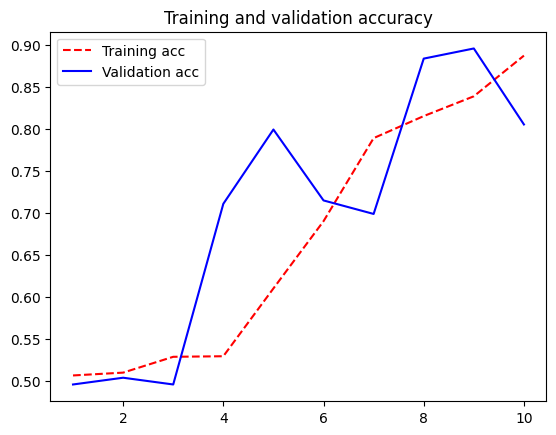

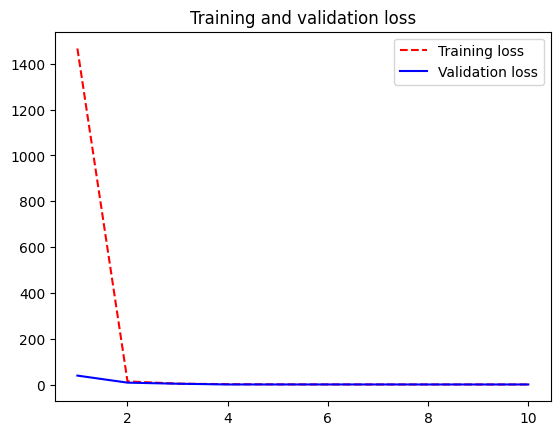

In [12]:
def plot_accuracy_and_loss(history):
    acc = history.history['binary_accuracy']
    val_acc = history.history['val_binary_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, '--r', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.show()

    plt.plot(epochs, loss, '--r', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

plot_accuracy_and_loss(history)

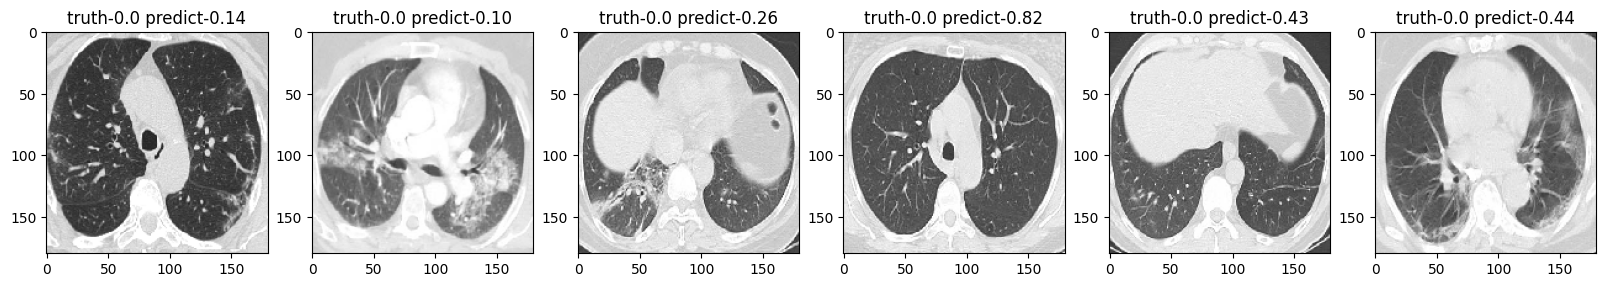

In [13]:
xtest, ytest = next(test_generator)
predictions = model.predict(xtest)
predictions = ['%.2f' %x for x in predictions] 

n = 6
plt.figure(figsize=(20, 4))
for i in range(1, n+1):
    ax = plt.subplot(1, n, i)
    plt.imshow(xtest[i])
    plt.gray()
    ax.title.set_text("truth-{0} predict-{1}".format((ytest[i]), (predictions[i]) ) )
    
plt.show()

In [14]:
model.save("models/denseNet/180-1000-500-200-adam-mse-binaryacc")

INFO:tensorflow:Assets written to: models/denseNet/180-1000-500-200-adam-mse-binaryacc/assets
